## Import Libraries

In [216]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [217]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]
# since we have bias then 
x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print("shape of x is ", x.shape)
print("shape of y is ", y.shape)

shape of x is  (25, 4)
shape of y is  (25, 1)


### Main functions

In [218]:
def initialization(x):
    costs, err_ls = [], []
    n = x.shape[1]
    theta, m, v = np.zeros((n, 1)), np.zeros((n, 1)), np.zeros((n, 1))
    return theta, costs, err_ls, m, v 

def h(x, theta):
    y_pred = x @ theta
    return y_pred
  
def J(y_pred, y):
    e = y_pred - y
    n = len(y_pred)
    loss = (1/(2* n))*(e.T @ e)[0][0]
    return loss
def calc_gradient(y_pred, y, x):
    e = y_pred - y
    n = len(y_pred)
    D_theta = x.T @ e * (1/n)
    return D_theta 

def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)

#  ADAM + Mini_Batch + Bias_corrolation to train a multivariable linear regression model.

In [236]:
def create_mini_batches(inputs, targets, batch_size):
    mini_batches = []
    data = np.hstack((inputs, targets))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [248]:
def Adam_mini_batch(x, y, alpha, max_it, batch_size, epsilon, beta1, beta2):
    theta, costs, thetas, v, m = initialization(x)
    for i in range(0, max_it):
        mini_batches = create_mini_batches(x, y, batch_size)
        t = 0
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            t = t+1
            #hypothisis
            y_pred = h(X_mini, theta)
            #calc cost
            loss = J(y_pred,y_mini)
            #update gradient
            D_theta = calc_gradient(y_pred, y_mini, X_mini)
            #update next step using adam + bias corrolation
            m = beta1 * m + ((1 - beta1) * D_theta) 
            v = beta2 * v + ((1 - beta2) * (D_theta ** 2))
            m_hat = m / (1 - beta1 **(t)) 
            v_hat = v / (1 - beta2 **(t)) 
            #update next step 
            theta = theta - ((alpha * m_hat) / (np.sqrt(v_hat) + epsilon))
        thetas.append(theta)
        costs.append(loss)   
        if abs(loss - costs[i-1]) < 0.001 and i!=0:
            break
        elif np.linalg.norm(D_theta) < 0.001:
            break
    return thetas, costs

## Test case 1

In [249]:
thetas, costs = Adam_mini_batch(x, y, alpha = 0.01, max_it = 1000, batch_size = 16, epsilon= 1e-8, beta1= .9, beta2= .999)
y_pred = h(x, thetas[-1])
print("R2score =", r2_score(y, y_pred))

R2score = 0.9781272260904503


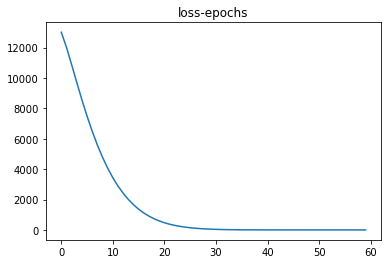

In [250]:
plt.plot(costs)
plt.title("loss-epochs")
plt.show()

60 4


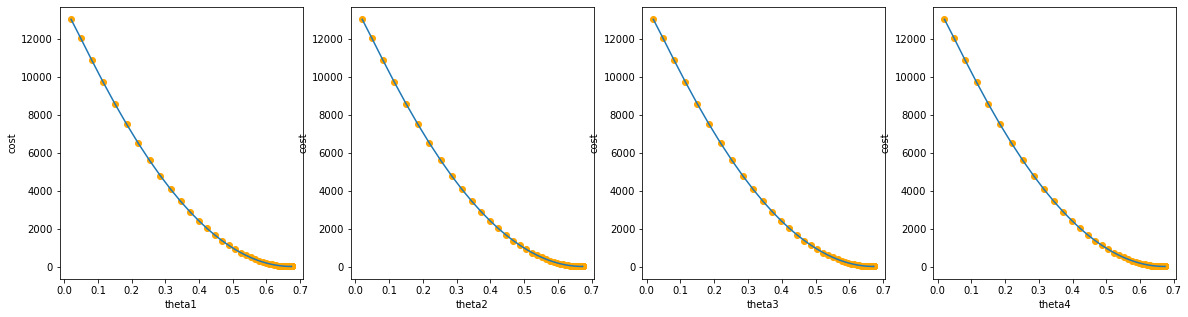

In [251]:
thetaVSloss(thetas, costs)

## Test case 2 (Full Batch)

In [252]:
thetas, costs = Adam_mini_batch(x, y, alpha = 0.01, max_it = 1000, batch_size = 25, epsilon= 1e-8, beta1= .9, beta2= .999)
y_pred = h(x, thetas[-1])
print("R2score =", r2_score(y, y_pred))

R2score = 0.9782998937637806


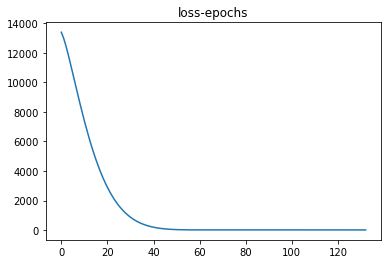

In [253]:
plt.plot(costs)
plt.title("loss-epochs")
plt.show()

133 4


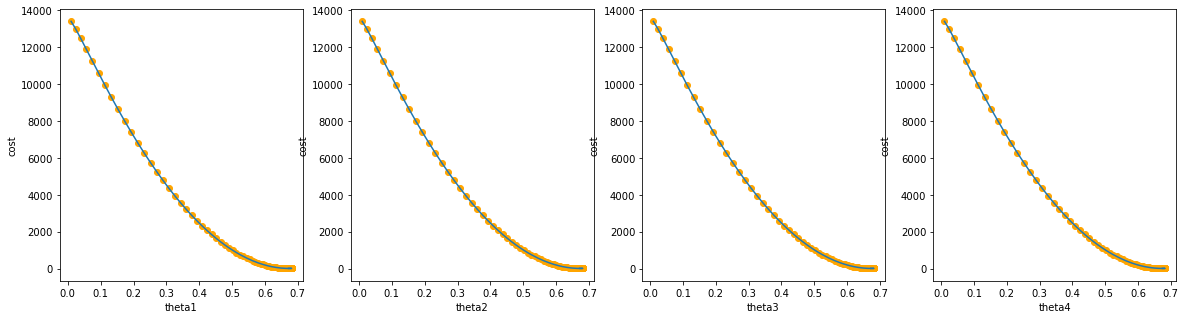

In [254]:
thetaVSloss(thetas, costs)